# What affects the most on study performance

https://www.kaggle.com/datasets/lainguyn123/student-performance-factors/data

# Read the Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
filepath = '/content/drive/MyDrive/Colab Notebooks/datasets/StudentPerformanceFactors.csv'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv(filepath)

In [ ]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


# Explore

In [ ]:
df.shape

(6607, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [ ]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
import pandas as pd

# (Assuming you already have `df` loaded)
cat_cols = df.select_dtypes(include='object').columns
print("Categorical columns:\n", cat_cols, "\n")

for col in cat_cols:
    print(f"=== {col} ===")
    print(df[col].value_counts(dropna=False))
    print()


#

num_cols = df.select_dtypes(include=[np.number]).columns
print("Numeric columns:\n", num_cols, "\n")

corr_matrix = df[num_cols].corr()
print(corr_matrix)
#

print("Correlation of each numeric feature with Exam_Score:")
print(corr_matrix['Exam_Score'].sort_values(ascending=False))


Categorical columns:
 Index(['Parental_Involvement', 'Access_to_Resources',
       'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access',
       'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
       'Learning_Disabilities', 'Parental_Education_Level',
       'Distance_from_Home', 'Gender'],
      dtype='object') 

=== Parental_Involvement ===
Parental_Involvement
Medium    3362
High      1908
Low       1337
Name: count, dtype: int64

=== Access_to_Resources ===
Access_to_Resources
Medium    3319
High      1975
Low       1313
Name: count, dtype: int64

=== Extracurricular_Activities ===
Extracurricular_Activities
Yes    3938
No     2669
Name: count, dtype: int64

=== Motivation_Level ===
Motivation_Level
Medium    3351
Low       1937
High      1319
Name: count, dtype: int64

=== Internet_Access ===
Internet_Access
Yes    6108
No      499
Name: count, dtype: int64

=== Family_Income ===
Family_Income
Low       2672
Medium    2666
High      1269
Name: c

In [ ]:
# For each categorical column, compute the count and mean Exam_Score by category
for col in cat_cols:
    stats = df.groupby(col)['Exam_Score'].agg(['count', 'mean']).sort_values('mean', ascending=False)
    print(f"\n=== {col} ===")
    print(stats)



=== Parental_Involvement ===
                      count       mean
Parental_Involvement                  
High                   1908  68.092767
Medium                 3362  67.098156
Low                    1337  66.358265

=== Access_to_Resources ===
                     count       mean
Access_to_Resources                  
High                  1975  68.092152
Medium                3319  67.134378
Low                   1313  66.203351

=== Extracurricular_Activities ===
                            count       mean
Extracurricular_Activities                  
Yes                          3938  67.441849
No                           2669  66.931435

=== Motivation_Level ===
                  count       mean
Motivation_Level                  
High               1319  67.704321
Medium             3351  67.330648
Low                1937  66.752194

=== Internet_Access ===
                 count       mean
Internet_Access                  
Yes               6108  67.292895
No          

# Some Plotings

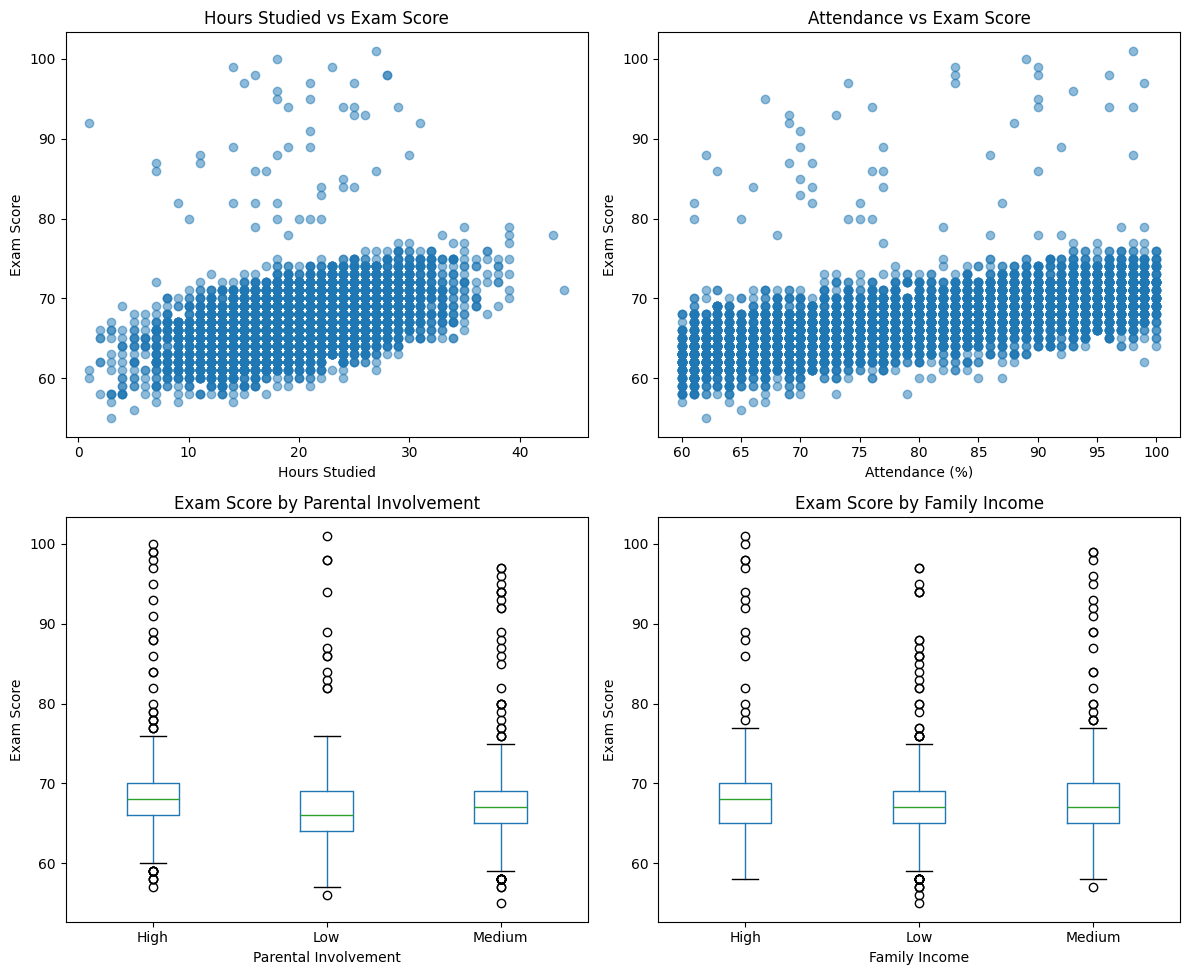

In [ ]:
import matplotlib.pyplot as plt

# Create a 2x2 grid of plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Scatter: Hours_Studied vs Exam_Score
axes[0, 0].scatter(df['Hours_Studied'], df['Exam_Score'], alpha=0.5)
axes[0, 0].set_xlabel('Hours Studied')
axes[0, 0].set_ylabel('Exam Score')
axes[0, 0].set_title('Hours Studied vs Exam Score')

# Scatter: Attendance vs Exam_Score
axes[0, 1].scatter(df['Attendance'], df['Exam_Score'], alpha=0.5)
axes[0, 1].set_xlabel('Attendance (%)')
axes[0, 1].set_ylabel('Exam Score')
axes[0, 1].set_title('Attendance vs Exam Score')

# Boxplot: Exam_Score by Parental_Involvement
df.boxplot(column='Exam_Score', by='Parental_Involvement', ax=axes[1, 0], grid=False)
axes[1, 0].set_xlabel('Parental Involvement')
axes[1, 0].set_ylabel('Exam Score')
axes[1, 0].set_title('Exam Score by Parental Involvement')
axes[1, 0].figure.suptitle('')  # Remove automatic title

# Boxplot: Exam_Score by Family_Income
df.boxplot(column='Exam_Score', by='Family_Income', ax=axes[1, 1], grid=False)
axes[1, 1].set_xlabel('Family Income')
axes[1, 1].set_ylabel('Exam Score')
axes[1, 1].set_title('Exam Score by Family Income')
axes[1, 1].figure.suptitle('')  # Remove automatic title

plt.tight_layout()
plt.show()


Hours Studied vs. Exam Score (top‐left):

There’s a fairly clear upward trend—students who study more hours tend to score higher.

Below about 10 hours/week, most scores cluster around the mid‐60s; above ~20 hours, scores shift into the high‐60s and low‐70s, with occasional high 80s–100s.

Attendance vs. Exam Score (top‐right):

A similar positive relationship: as attendance approaches 100%, exam scores tend to be in the upper 60s and 70s.

Students with attendance below ~70% rarely break into the mid‐70s on the exam.

Exam Score by Parental Involvement (bottom‐left):

“High” parental involvement has a slightly higher median (around 68) compared to “Medium” (≈67) and “Low” (≈66).

The spread (interquartile range) for all three is roughly similar, but “High” involvement shows more outliers on the upper end (scores in the 90s+).

Exam Score by Family Income (bottom‐right):

Students from “High”‐income families also have a marginally higher median (≈68) versus “Medium” (≈67) and “Low” (≈66).

Again, the IQRs overlap considerably, but “High” income produces more high‐score outliers (90s+).

# Data preprocessing


In [ ]:


# 2. Define which columns are ordinal, binary, and nominal
ordinal_cols = [
    'Parental_Involvement',      # Low < Medium < High
    'Access_to_Resources',       # Low < Medium < High
    'Motivation_Level',          # Low < Medium < High
    'Family_Income',             # Low < Medium < High
    'Teacher_Quality',           # Low < Medium < High
    'Parental_Education_Level',  # High School < College < Postgraduate
    'Distance_from_Home'         # Near < Moderate < Far
]

binary_cols = [
    'Extracurricular_Activities',  # Yes/No
    'Internet_Access',             # Yes/No
    'Learning_Disabilities'        # Yes/No
]

nominal_cols = [
    'Peer_Influence',  # Positive, Neutral, Negative
    'Gender',          # Male, Female
    'School_Type'      # Public, Private
]

# 3. Fill missing values in each ordinal column using its mode (most common)
for col in ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']:
    mode_val = df[col].mode()[0]
    df[col] = df[col].fillna(mode_val)

# 4. Define mapping dictionaries for each ordinal column
ord_mappings = {
    'Parental_Involvement':     {'Low': 0, 'Medium': 1, 'High': 2},
    'Access_to_Resources':      {'Low': 0, 'Medium': 1, 'High': 2},
    'Motivation_Level':         {'Low': 0, 'Medium': 1, 'High': 2},
    'Family_Income':            {'Low': 0, 'Medium': 1, 'High': 2},
    'Teacher_Quality':          {'Low': 0, 'Medium': 1, 'High': 2},
    'Parental_Education_Level': {'High School': 0, 'College': 1, 'Postgraduate': 2},
    'Distance_from_Home':       {'Near': 0, 'Moderate': 1, 'Far': 2}
}

# 5. Apply ordinal mappings
for col, mapping in ord_mappings.items():
    df[col] = df[col].map(mapping)

# 6. Convert binary columns to 0/1
binary_mapping = {'Yes': 1, 'No': 0}
for col in binary_cols:
    df[col] = df[col].map(binary_mapping)

# 7. One‐hot encode the nominal columns (dropping the first dummy to avoid multicollinearity)
df_nominal_ohe = pd.get_dummies(df[nominal_cols], drop_first=True)

# 8. Assemble final DataFrame: keep all numeric columns, the newly mapped ordinal/binary, and the one‐hot dummies
numeric_cols = ['Hours_Studied', 'Attendance', 'Sleep_Hours',
                'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity']
target_col = ['Exam_Score']

df_encoded = pd.concat(
    [
        df[numeric_cols],           # original numeric
        df[ordinal_cols],           # now integers 0/1/2
        df[binary_cols],            # now 0/1
        df_nominal_ohe,             # newly one‐hot columns
        df[target_col]              # keep the target last
    ],
    axis=1
)

# 9. Inspect the first few rows of the encoded DataFrame
print("Encoded DataFrame shape:", df_encoded.shape)
print(df_encoded.head())


Encoded DataFrame shape: (6607, 21)
   Hours_Studied  Attendance  Sleep_Hours  Previous_Scores  Tutoring_Sessions  \
0             23          84            7               73                  0   
1             19          64            8               59                  2   
2             24          98            7               91                  2   
3             29          89            8               98                  1   
4             19          92            6               65                  3   

   Physical_Activity  Parental_Involvement  Access_to_Resources  \
0                  3                     0                    2   
1                  4                     0                    1   
2                  4                     1                    1   
3                  4                     0                    1   
4                  4                     1                    1   

   Motivation_Level  Family_Income  ...  Parental_Education_Level  \
0    

# Choose model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# 1. Separate predictors (X) and target (y)
X = df_encoded.drop(columns=['Exam_Score'])
y = df_encoded['Exam_Score']

# 2. Split into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# 3. Fit a baseline Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# 4. Make predictions on the test set
y_pred = lr.predict(X_test)

# 5. Evaluate performance (compute RMSE manually)
mse = mean_squared_error(y_test, y_pred)      # default squared=True
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Test RMSE: {rmse:.3f}")
print(f"Test R^2: {r2:.3f}")

# 6. Extract and display coefficients
coef_df = pd.DataFrame({
    'feature': X.columns,
    'coefficient': lr.coef_
})
# Sort by absolute value of coefficient (descending)
coef_df['abs_coef'] = coef_df['coefficient'].abs()
coef_df = coef_df.sort_values('abs_coef', ascending=False).drop(columns='abs_coef')
print("\nTop coefficients (by absolute value):")
print(coef_df.head(10))


Test RMSE: 1.800
Test R^2: 0.771

Top coefficients (by absolute value):
                       feature  coefficient
17     Peer_Influence_Positive     1.053504
7          Access_to_Resources     1.048769
6         Parental_Involvement     1.005078
14             Internet_Access     0.955267
15       Learning_Disabilities    -0.854255
13  Extracurricular_Activities     0.578661
16      Peer_Influence_Neutral     0.567130
9                Family_Income     0.539089
10             Teacher_Quality     0.524690
8             Motivation_Level     0.519566


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# 1. Prepare X and y (same as before)
X = df_encoded.drop(columns=['Exam_Score'])
y = df_encoded['Exam_Score']

# 2. Split into train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# 3. Instantiate and fit a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 4. Predict on the test set
y_pred_rf = rf.predict(X_test)

# 5. Compute RMSE and R^2
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"RF Test RMSE: {rmse_rf:.3f}")
print(f"RF Test R^2: {r2_rf:.3f}")

# 6. Get and display feature importances
feat_imp = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 feature importances:")
print(feat_imp.head(10))


RF Test RMSE: 2.154
RF Test R^2: 0.672

Top 10 feature importances:
                     feature  importance
1                 Attendance    0.378496
0              Hours_Studied    0.241777
3            Previous_Scores    0.086323
4          Tutoring_Sessions    0.035283
6       Parental_Involvement    0.034746
7        Access_to_Resources    0.032563
2                Sleep_Hours    0.028506
5          Physical_Activity    0.027441
9              Family_Income    0.017877
11  Parental_Education_Level    0.017488


The Random Forest’s performance dipped relative to linear regression (R²≈0.67 vs. 0.77), but it still gives us a clear ranking of which features drive predictions in a non‐linear setting. In this RF model:

Attendance (≈0.38 importance) and Hours_Studied (≈0.24) dominate—together they account for over 60% of the total importance.

Previous_Scores (≈0.086) and Tutoring_Sessions (≈0.035) follow next.

The next four are the mapped ordinal factors: Parental_Involvement (≈0.035), Access_to_Resources (≈0.033), Sleep_Hours (≈0.029), and Physical_Activity (≈0.027).

Finally, Family_Income (≈0.018) and Parental_Education_Level (≈0.017) round out the top ten.



# Measuring
